In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import pickle
import calendar

In [2]:
# import note
notes = pd.read_parquet('notes.parquet', engine='auto')

In [3]:
users_no = len(notes['noteAuthorParticipantId'].unique())
print(f"Number of unique note authors: {users_no}")

first_note_date = \
    datetime.fromtimestamp(notes['createdAtMillis'].min()/1000).\
    strftime("%B %d, %Y")
last_note_date = \
    datetime.fromtimestamp(notes['createdAtMillis'].max()/1000).\
    strftime("%B %d, %Y")
print(f"The first note we have was created at {first_note_date} \
and the last one at {last_note_date}.")

Number of unique note authors: 213216
The first note we have was created at January 28, 2021 and the last one at December 12, 2024.


In [ ]:
# notes per month and year
notes.groupby(['createdAtYear', 'createdAtMonth'])['noteId'].count()

createdAtYear  createdAtMonth
2021           1                   1035
               2                   2037
               3                   1698
               4                   1271
               5                   1232
               6                   1303
               7                   1224
               8                   1819
               9                   2101
               10                  1948
               11                  1593
               12                  1312
2022           1                   1155
               2                   1022
               3                   1173
               4                   1132
               5                   1968
               6                   1884
               7                   1212
               8                   1142
               9                    910
               10                  1469
               11                  3964
               12                  3685
2023      

In [6]:
# notes per year
notes.groupby(['createdAtYear'])['noteId'].count()

createdAtYear
2021      18573
2022      20716
2023     392285
2024    1059558
Name: noteId, dtype: int64

In [11]:
# active authors per year
notes.groupby(['createdAtYear']).agg({'noteAuthorParticipantId': 'nunique'}).reset_index()


,createdAtYear,noteAuthorParticipantId
0,2021,3200
1,2022,3809
2,2023,67827
3,2024,182577


In [29]:
# new users per month
new_authors_monthly = notes.groupby('noteAuthorParticipantId').first()\
    .reset_index()\
    .groupby(['createdAtYear', 'createdAtMonth'])['noteId'].nunique()\
        .reset_index()
new_authors_monthly.rename(columns={'noteId': 'count'}, inplace=True)

In [27]:
# active users per month
active_authors_monthly = notes.groupby(['createdAtYear', 'createdAtMonth'])\
    .agg({'noteAuthorParticipantId': 'nunique'}).reset_index()
active_authors_monthly.rename(columns={'noteAuthorParticipantId': 'count'}, inplace=True)

In [30]:
active_authors_monthly

,createdAtYear,createdAtMonth,count
0,2021,1,400
1,2021,2,671
2,2021,3,597
3,2021,4,484
4,2021,5,344
5,2021,6,485
6,2021,7,462
7,2021,8,733
8,2021,9,869
9,2021,10,759


In [31]:
new_authors_monthly

,createdAtYear,createdAtMonth,count
0,2021,1,400
1,2021,2,451
2,2021,3,329
3,2021,4,170
4,2021,5,98
5,2021,6,175
6,2021,7,111
7,2021,8,369
8,2021,9,428
9,2021,10,318


To check if the community is alive because of new users or not, let's see new users vs active users per month.

In [44]:
notes['createdAtYM'] = notes['createdAt'].dt.to_period('M')


In [46]:
# new users per month
new_authors_monthly = notes.groupby('noteAuthorParticipantId').first()\
    .reset_index()\
    .groupby(['createdAtYM'])['noteId'].nunique()\
        .reset_index()
new_authors_monthly.rename(columns={'noteId': 'count'}, inplace=True)

In [45]:
# active users per month
active_authors_monthly = notes.groupby(['createdAtYM'])\
    .agg({'noteAuthorParticipantId': 'nunique'}).reset_index()
active_authors_monthly.rename(columns={'noteAuthorParticipantId': 'count'}, inplace=True)

/tmp/ipykernel_19113/2497700907.py:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(labels)


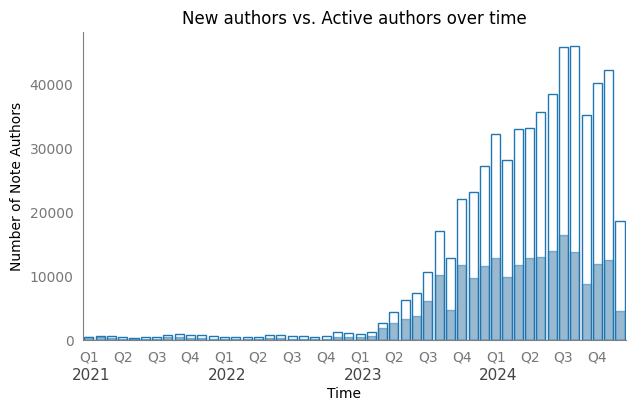

In [ ]:
fig, ax = plt.subplots(1,1, figsize=(7,4))
sns.barplot(x="createdAtYM", y="count", data=active_authors_monthly,
             color='white', edgecolor='tab:blue')
sns.barplot(x="createdAtYM", y="count", data=new_authors_monthly,
             edgecolor='tab:blue', alpha=.5)

# set quartely labels
labels = [''] * len(ax.get_xticklabels())
for idx, element in enumerate(labels[::3]):
    labels[idx*3] = 'Q' + str(idx%4 + 1)

ax.set_xticklabels(labels)
# add years
for idx, year in enumerate(range(2021,2025)):
    ax.text(idx*.25 -.02, -.13, str(year), size=11, color='#444', transform=ax.transAxes)
ax.set_xlabel('Time')
ax.xaxis.set_label_coords(.48, -.15)
ax.set_ylabel('Number of Note Authors')
ax.tick_params(axis='both', colors="#777777", left=False, bottom=False)
ax.spines[['bottom', 'left']].set_color("grey")
# ax.legend(['Unmet Demand', 'Capacity'])
ax.spines[['right', 'top']].set_visible(False)
#update last month
ax.set_title(f'New authors vs. Active authors over time')
# add keydates
plt.show()

Qustion: what percentage of note authors from 2021, 2022, 2023 are still authoring notes in 2024?

In [3]:
# make a dict of the list of unique authors each year
distinct_authors_dict = {}

for year in range(2021, 2025):
    distinct_authors_dict[year] = notes[notes['createdAtYear'] == year]['noteAuthorParticipantId'].unique()

In [32]:
# create a dateframe for comparing persistant authors during years
year_range = range(2021, 2025)
index = [year for year in year_range]
remain_active = pd.DataFrame(columns=index, index=index)
remain_active_matrix = np.empty(len(year_range))
for year_start in year_range:
    for year_active in year_range:
        if year_start <= year_active:
            remain_active.loc[year_active, year_start] = \
                len(np.intersect1d(distinct_authors_dict[year_start], distinct_authors_dict[year_active])) \
                    / len(distinct_authors_dict[year_start])


Text(0.5, 1.0, 'Fraction of authors who remained active after their first note')

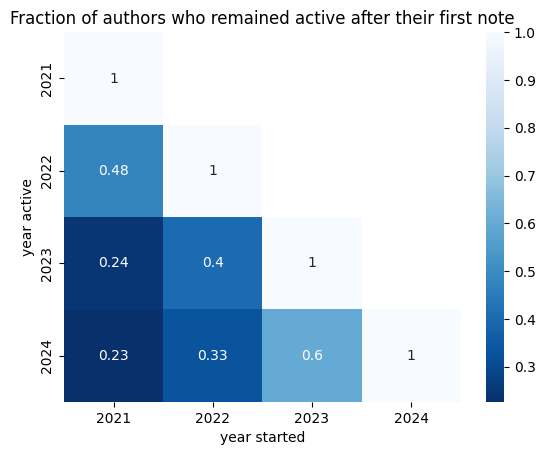

In [ ]:
# plot
ax = plt.subplot()
# remove the upper triangle
mask = np.triu(np.ones_like(remain_active))
# set the diagonal to 0; so it wouldn't be masked
np.fill_diagonal(mask, 0)
sns.heatmap(remain_active.astype(float), annot = True, mask=mask, cmap='Blues_r', ax=ax)

ax.set_xlabel('year started')
ax.set_ylabel('year active')
ax.set_title('Fraction of authors who remained active after their first note')


### notes authored per user per month or quarter. 
How long does the typical author have consecutive months > 0 on this measure?

In [5]:
col = ['noteAuthorParticipantId']
df_author = notes.groupby(col)
month_diff = df_author['createdAtMonth'].diff()
year_diff = df_author['createdAtYear'].diff()
nonconsecutive = ~((year_diff.eq(0) & month_diff.eq(1)) | (year_diff.eq(1) & month_diff.eq(-11)))
max_consecutive = notes.groupby([*col, nonconsecutive.cumsum()]).size().droplevel(-1).groupby(col).max().reset_index(name='counts')

In [6]:
max_consecutive.describe()

,counts
count,213216.000000
mean,1.557529
std,0.795287
min,1.000000
25%,1.000000
50%,1.000000
75%,2.000000
max,9.000000


In [23]:
# let's do the same for quarters
col = ['noteAuthorParticipantId']
notes['quarter'] = pd.PeriodIndex(notes.createdAt, freq='Q')
df_author = notes.groupby(col)

diff = df_author['quarter'].diff().apply(lambda x: x if pd.isnull(x) else x.n)
nonconsecutive = ~(diff.eq(1))
max_consecutive_q = notes.groupby([*col, nonconsecutive.cumsum()]).size().droplevel(-1).groupby(col).max().reset_index(name='counts')

In [24]:
max_consecutive_q.describe()

,counts
count,213216.000000
mean,1.480138
std,0.657977
min,1.000000
25%,1.000000
50%,1.000000
75%,2.000000
max,9.000000


array([[<Axes: title={'center': 'counts'}>]], dtype=object)

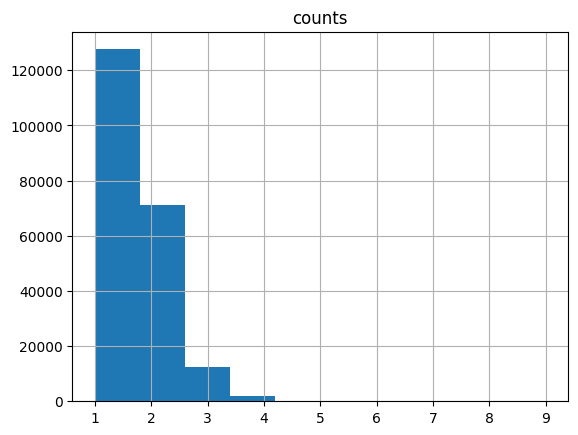

In [25]:
max_consecutive_q.hist()

Since we have used the date quarters, it does not show very accurate figures. E.g. Someone who has written only one note is counted in active in 1 quarter. Plus, if you write something in march and another in april, you were active for two quarters. Maybe having rolling quarters would be a better approach if we need it.

### Q4. What is distribution of authoring among participants? Can we identify superusers who author most notes? Do the questions 1 - 3, above, look different if we restrict our analyses superusers?

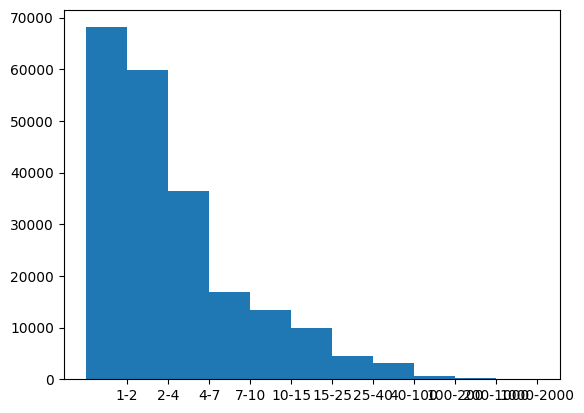

In [26]:
# let's see the distribution of notes per author first
count_notes_per_author = notes.groupby('noteAuthorParticipantId')['noteId'].count().to_list()
bins = [1, 2, 4, 7, 10, 15, 25, 40, 100, 200, 1000, 2000]
hist, bin_edges = np.histogram(count_notes_per_author,bins) # make the histogram

fig,ax = plt.subplots()

# Plot the histogram heights against integers on the x axis
ax.bar(range(len(hist)),hist,width=1) 

# Set the ticks to the middle of the bars
ax.set_xticks([0.5+i for i,j in enumerate(hist)])

# Set the xticklabels to a string that tells us what the bin edges were
ax.set_xticklabels(['{}-{}'.format(bins[i],bins[i+1]) for i,j in enumerate(hist)])

plt.show()

There are some users who writes a lot! 


In [28]:
pd.DataFrame(count_notes_per_author).describe()

,0
count,213216.000000
mean,6.993528
std,65.324266
min,1.000000
25%,1.000000
50%,3.000000
75%,6.000000
max,23704.000000


Someone has written 23000 notes! Could they be bots? 
Let's check some of their notes!

In [55]:
count_notes = notes.groupby('noteAuthorParticipantId')['noteId'].count().reset_index()
star_author = count_notes[count_notes['noteId'] == 23704]['noteAuthorParticipantId'].to_list()[0]
notes[notes['noteAuthorParticipantId'] == star_author]['summary'].sample(20)

1404036    ⚠️ Deceptive site ahead    Potential threats o...
1401096    ⚠️ Deceptive site ahead ⚠️    Potential threat...
1419733    ⚠️ Deceptive site ahead    Potential threats o...
1410741    This account is impersonating @AndreCronjeTech...
1407908    ⚠️ Deceptive site ahead    Potential threats o...
1403647    ⚠️ Deceptive site ahead    Potential threats o...
1413981    ⚠️ Deceptive site ahead    Potential threats o...
1419588    ⚠️ Deceptive site ahead    Potential threats o...
1415722    ⚠️ Deceptive site ahead    Potential threats o...
1401937    This account is impersonating @justinsuntron. ...
1400353    ⚠️ Important Notice ⚠️    The link airdrop[.]o...
1413865    ⚠️ Deceptive site ahead    Potential threats o...
1419950    ⚠️ Deceptive site ahead    Potential threats o...
1406863    ⚠️ Deceptive site ahead    Potential threats o...
1417326    ⚠️ Deceptive site ahead    Potential threats o...
1401849    ⚠️ Deceptive site ahead ⚠️    Potential threat...
1410066    ⚠️ Deceptive 

Some similar notes. They may be rated helpful though. Let's check it!

In [56]:
rated = pd.read_parquet('rated_notes_compact.parquet', engine='auto')

In [61]:
rated[rated['noteAuthorParticipantId'] == star_author]['finalRatingStatus'].describe()

count                        1197
unique                          1
top       CURRENTLY_RATED_HELPFUL
freq                         1197
Name: finalRatingStatus, dtype: object

About half of them are rated and all of them are rated helpful! Impressive!

In [26]:
#TODO 
# identify superusers and run analysis on them, instead of the whole authors
# how to define a superusers?


### Q. Rolling share of new vs older authors (6 months rolling window)

In [8]:
 # what fraction of notes were written by new (less than 3 months in CN) users

 #create a df from authors and when they joined
authors = notes.groupby('noteAuthorParticipantId')[['createdAt', 'createdAtYear', 'createdAtMonth']]\
    .first().reset_index()
# sort by date and make it the index, so the search would be easier
authors.sort_values(by='createdAt', inplace=True)
authors.set_index('createdAt', inplace=True)

In [5]:
share_new_authors = dict()
# start from Jan 2023
df = notes[notes.createdAt >= pd.Timestamp(2023, 1, 1)]
df_monthly = df.groupby(['createdAtYear', 'createdAtMonth'])['noteAuthorParticipantId']
for (year, month), notes_month in df_monthly:
    # count notes by new authors
    if_new = 0
    current_month = pd.Timestamp(year, month, 1)
    # create a list of authors joined in the past 3 months
    authors_new = authors.loc[(current_month - pd.DateOffset(months=3)): current_month]\
        ['noteAuthorParticipantId'].to_list()
    for author, count in notes_month.value_counts().items():
        if author in authors_new:
            if_new += count

    share_new_authors[(year, month)] = if_new / len(notes_month)

In [ ]:
#save share_new_authors
with open('share_new_authors_3.pkl', 'wb') as f:
    pickle.dump(share_new_authors, f)


In [3]:
# load share_new_authors
with open('share_new_authors_3.pkl', 'rb') as f:
    share_new_authors = pickle.load(f)

[]

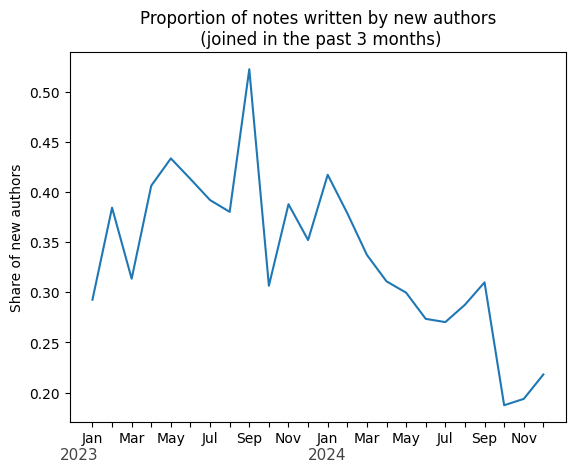

In [36]:
ax = plt.subplot()

sns.lineplot(x=range(len(share_new_authors)), y=share_new_authors.values())
x_labels = [calendar.month_abbr[month] for (year, month) in share_new_authors.keys()]
x_locs = [i for i in range(len(x_labels))]
ax.set_xticks(x_locs)
ax.set_xticklabels(x_labels)
for label in ax.xaxis.get_ticklabels()[1::2]:
    label.set_visible(False)
# add years
for idx, year in enumerate(range(2023,2025)):
    ax.text(idx*.5 -.02, -.1, str(year), size=11, color='#444', transform=ax.transAxes)
# ax.set_xlabel('Time')
ax.set_ylabel('Share of new authors')
ax.set_title('Proportion of notes written by new authors\n (joined in the past 3 months)')
plt.plot()

In [ ]:
# Redo analysis with 6 months
share_new_authors_6 = dict()
# start from Jan 2023
df = notes[notes.createdAt >= pd.Timestamp(2023, 1, 1)]
df_monthly = df.groupby(['createdAtYear', 'createdAtMonth'])['noteAuthorParticipantId']
for (year, month), notes_month in df_monthly:
    # count notes by new authors
    if_new = 0
    current_month = pd.Timestamp(year, month, 1)
    # create a list of authors joined in the past 6 months
    authors_new = authors.loc[(current_month - pd.DateOffset(months=6)): current_month]\
        ['noteAuthorParticipantId'].to_list()
    for author, count in notes_month.value_counts().items():
        if author in authors_new:
            if_new += count

    share_new_authors_6[(year, month)] = if_new / len(notes_month)
#save share_new_authors
with open('share_new_authors_6.pkl', 'wb') as f:
    pickle.dump(share_new_authors_6, f)

[]

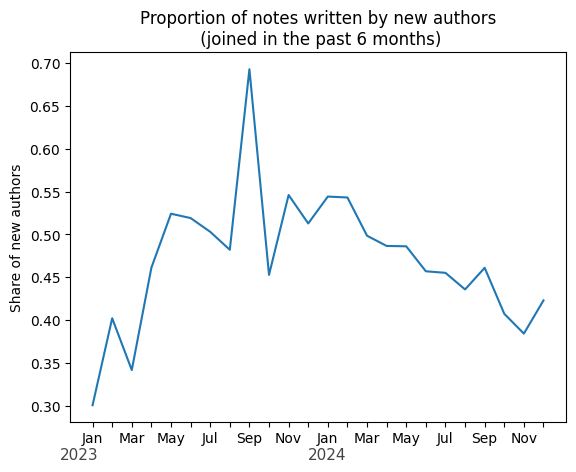

In [ ]:
# load share_new_authors
with open('share_new_authors_6.pkl', 'rb') as f:
    share_new_authors_6 = pickle.load(f)
ax = plt.subplot()

sns.lineplot(x=range(len(share_new_authors_6)), y=share_new_authors_6.values())
x_labels = [calendar.month_abbr[month] for (year, month) in share_new_authors_6.keys()]
x_locs = [i for i in range(len(x_labels))]
ax.set_xticks(x_locs)
ax.set_xticklabels(x_labels)
for label in ax.xaxis.get_ticklabels()[1::2]:
    label.set_visible(False)
# add years
for idx, year in enumerate(range(2023,2025)):
    ax.text(idx*.5 -.02, -.1, str(year), size=11, color='#444', transform=ax.transAxes)
# ax.set_xlabel('Time')
ax.set_ylabel('Share of new authors')
ax.set_title('Proportion of notes written by new authors\n (joined in the past 6 months)')
plt.plot()

### Cumulative note authors vs 10+ note authors over time

In [45]:
# cumulative number of authors
cum_authors_monthly = notes.groupby('noteAuthorParticipantId').first()\
    .reset_index()\
    .groupby(['createdAtYear', 'createdAtMonth'])['noteId'].nunique()\
        .reset_index()
cum_authors_monthly['cum_authors'] = cum_authors_monthly['noteId'].cumsum()
cum_authors_monthly.rename(columns={'noteId': 'count'}, inplace=True)

In [98]:
# cumulative number of authors with more than 10 notes
df_10 = notes[notes.groupby('noteAuthorParticipantId')['noteAuthorParticipantId'].transform('size').gt(9)]
cum_authors_monthly_10 = df_10.groupby('noteAuthorParticipantId').first()\
    .reset_index()\
    .groupby(['createdAtYear', 'createdAtMonth'])['noteId'].nunique()\
        .reset_index()
cum_authors_monthly_10['cum_authors'] = cum_authors_monthly_10['noteId'].cumsum()
cum_authors_monthly_10.rename(columns={'noteId': 'count'}, inplace=True)

[]

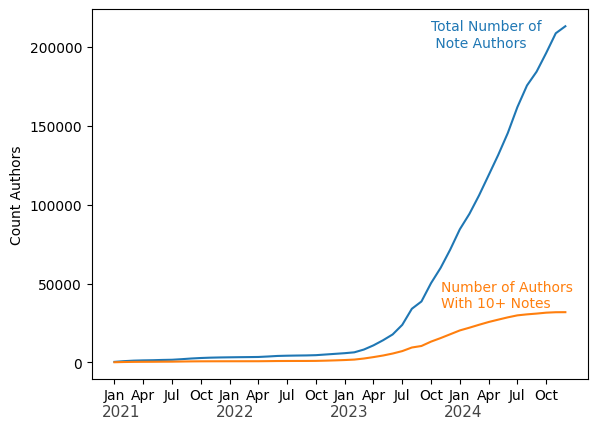

In [100]:
ax = sns.lineplot(x=range(len(cum_authors_monthly)), y=cum_authors_monthly['cum_authors'])
# add authors with more than 10 notes
sns.lineplot(x=range(len(cum_authors_monthly_10)), y=cum_authors_monthly_10['cum_authors'])
x_labels = [calendar.month_abbr[month] for month in cum_authors_monthly['createdAtMonth']]
x_locs = [i for i in range(len(x_labels))]
# ax.get_xaxis().set_visible(False)
ax.set_xticks(x_locs[::3])
ax.set_xticklabels(x_labels[::3])

# add years
for idx, year in enumerate(range(2021,2025)):
    ax.text(idx*.23 +.02, -.1, str(year), size=11, color='#444', transform=ax.transAxes)
ax.text(33, 200000, f'Total Number of\n Note Authors', color='tab:blue')
ax.text(34, 35000, f'Number of Authors\nWith 10+ Notes', color='#ff7f0e')
# ax.set_xlabel('Time')
ax.set_ylabel('Count Authors')
# ax.set_title('Proportion of notes written by new authors\n (joined in the past 6 months)')
plt.plot()

Proportion of these two lines is not obvious. Let's make it in numbers.

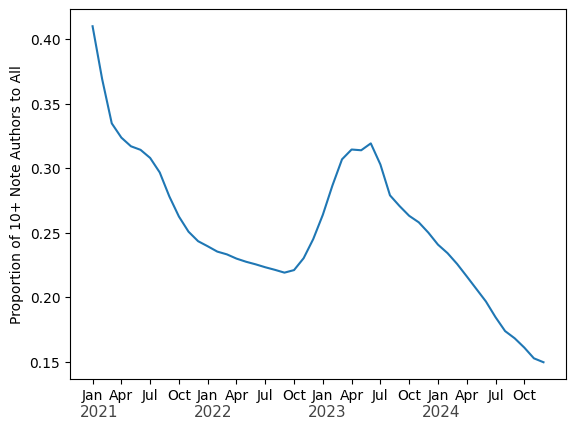

In [105]:
proportion_10_plus = cum_authors_monthly_10['cum_authors'] / cum_authors_monthly['cum_authors']
ax = sns.lineplot(x=range(len(cum_authors_monthly)), y=proportion_10_plus)
x_labels = [calendar.month_abbr[month] for month in cum_authors_monthly['createdAtMonth']]
x_locs = [i for i in range(len(x_labels))]
# ax.get_xaxis().set_visible(False)
ax.set_xticks(x_locs[::3])
ax.set_xticklabels(x_labels[::3])

# add years
for idx, year in enumerate(range(2021,2025)):
    ax.text(idx*.23 +.02, -.1, str(year), size=11, color='#444', transform=ax.transAxes)

ax.set_ylabel('Proportion of 10+ Note Authors to All')
plt.show()